In [1]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [6]:
model = load_model("C:/Users/taqui/Downloads/BestModelAlert.keras")


In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 255, 255, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 255, 255, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 127, 127, 64)   │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 127, 127, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 62, 62, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 29, 29, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,041,827 (7.79 MB)

 Trainable params: 679,883 (2.59 MB)

 Non-trainable params: 2,176 (8.50 KB)

 Optimizer params: 1,359,768 (5.19 MB)

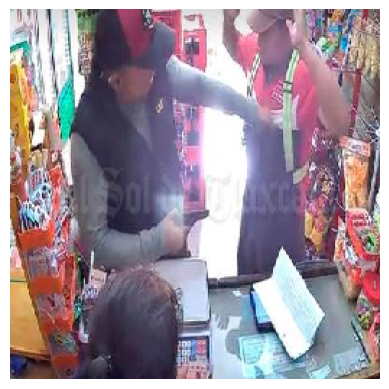

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
La clase predicha es: Forcejeos


In [14]:

# Ruta de la imagen
image_path = "C:/Users/taqui/Downloads/plazaForum.jpg"

# Carga la imagen y la convierte en un array numpy
img = image.load_img(image_path, target_size=(256, 256))
img_array = image.img_to_array(img)

# Normaliza la imagen al rango 0-1
img_array = img_array / 255.0

# Expande las dimensiones para que se ajuste al formato de entrada del modelo
img_array = np.expand_dims(img_array, axis=0)

# Muestra la imagen utilizando matplotlib
plt.imshow(img_array[0])
plt.axis('off')  # Desactiva los ejes
plt.show()

# Haz predicciones
predictions = model.predict(img_array)

# Obtener la clase predicha
predicted_class = np.argmax(predictions, axis=1)

# Diccionario de clases (debe coincidir con las clases que usaste en el entrenamiento)
class_labels = {
    0: "Arma blanca",
    1: "Arma corta",
    2: "Arma larga",
    3: "Ataque de perro",
    4: "Choques",
    5: "Encañonamiento",
    6: "Forcejeos",
    7: "Incendios",
    8: "Patadas",
    9: "Personas heridas",
    10: "Golpes"
}

# Imprime la clase predicha
print(f"La clase predicha es: {class_labels[predicted_class[0]]}")

In [93]:
predictions = model.predict(img_array)
predicted_classes = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [95]:
predictions

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [82]:
!tensorboard --logdir=C:/Users/taqui/Downloads/TensorboardVal --host 127.0.0.1 --port 8081

^C


2024-05-21 14:23:38.679341: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-21 14:23:39.884277: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
E0521 14:23:43.112659 21556 program.py:300] TensorBoard could not bind to port 8081, it was already in use
ERROR: TensorBoard could not bind to port 8081, it was already in use
